In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller



In [2]:
# Load historical exchange rate data
# data = yf.download('EURUSD=X', start = '2021-01-01', end= '2022-01-01')
# exchange_rate = data['Close'].values

# Loading data

In [3]:
data = pd.read_csv('EURUSD=X.csv')

In [4]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-03,1.129089,1.130531,1.127040,1.129305,1.129305,0
1,2019-07-04,1.128796,1.129816,1.127434,1.128796,1.128796,0
2,2019-07-05,1.128605,1.128796,1.120825,1.128579,1.128579,0
3,2019-07-08,1.122788,1.123722,1.120838,1.122738,1.122738,0
4,2019-07-09,1.121479,1.122208,1.119532,1.121604,1.121604,0


# Exploratory data analysis

In [6]:
# getting the shape of dataset
data.shape

(1306, 7)

In [7]:
# checking columns in dataset
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
# checking if there is any null values in dataframe
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
# checking if dataset has duplicated values
data.duplicated().sum()

0

In [10]:
# checking the data type of the column in the dataset
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1306 non-null   object 
 1   Open       1306 non-null   float64
 2   High       1306 non-null   float64
 3   Low        1306 non-null   float64
 4   Close      1306 non-null   float64
 5   Adj Close  1306 non-null   float64
 6   Volume     1306 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 71.5+ KB


In [12]:
# The summary of various descriptive statistics for the numeric column in the dataset
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.0
mean,1.111198,1.114512,1.107722,1.111225,1.111225,0.0
std,0.057135,0.056704,0.057528,0.057153,0.057153,0.0
min,0.959619,0.967006,0.954016,0.959619,0.959619,0.0
25%,1.076661,1.079476,1.073209,1.076690,1.076690,0.0
50%,1.101212,1.103997,1.096960,1.101303,1.101303,0.0
75%,1.159292,1.161103,1.156096,1.159454,1.159454,0.0
max,1.233776,1.235025,1.226693,1.234111,1.234111,0.0


In [13]:
# recent and oldest date within data

start_date = data['Date'].min()
print('Oldest datime: ',start_date)

end_date = data['Date'].max()
print('Recent datime: ',end_date)

Oldest datime:  2019-07-03
Recent datime:  2024-07-03


In [14]:
 # How many unique values of open, close, high and low are in dataset

print("Unique open values:",data.Open.unique().size)
print("Unique close values:",data.Close.unique().size)
print("Unique high values:",data.High.unique().size)
print("Unique low values:",data.Low.unique().size)

Unique open values: 1229
Unique close values: 1209
Unique high values: 1161
Unique low values: 1240


# Data Preprocessing

In [15]:
# converting the data type of Date column to Date
data['Date'] = pd.to_datetime(data['Date'])


In [16]:
data = data.drop('Volume', axis=1)

# Data Processing & Visualization

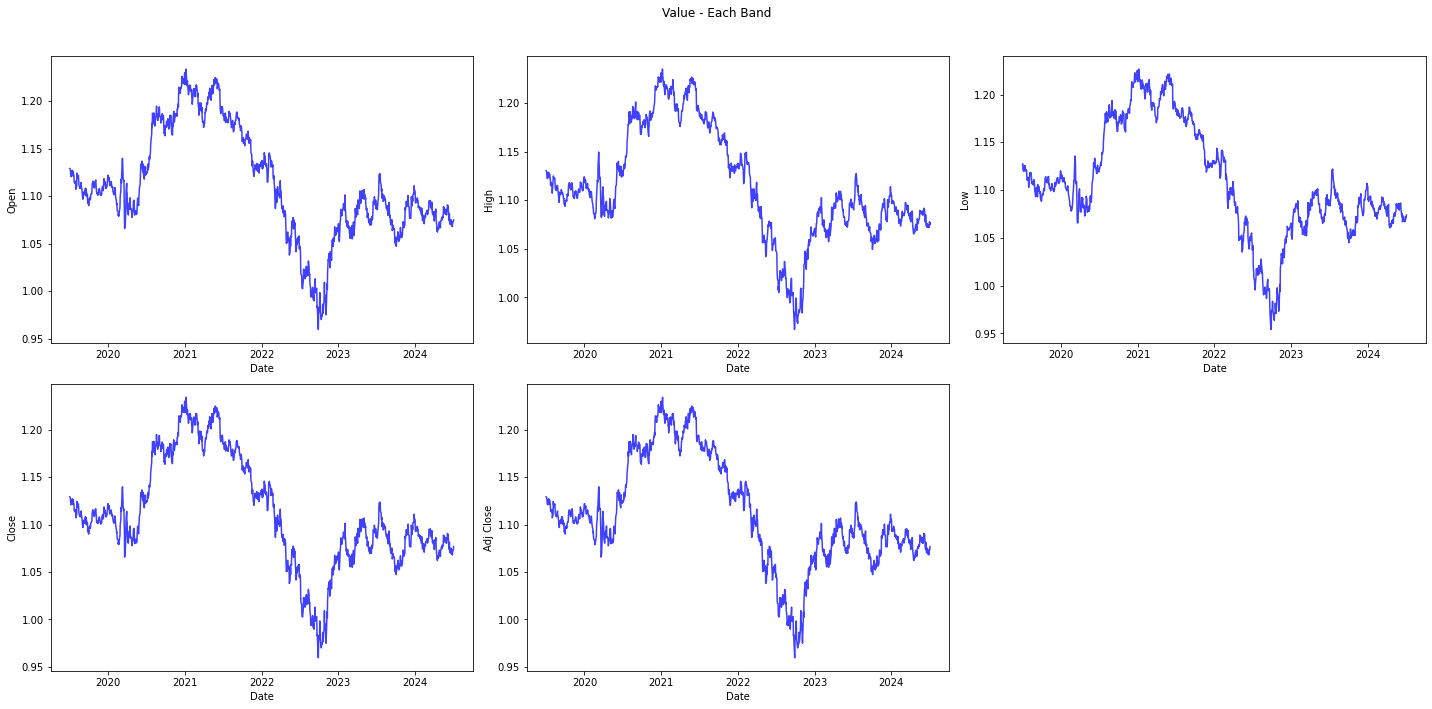

In [17]:
# Values during days
values = ['Open', 'High', 'Low', 'Close', 'Adj Close']

# Fig size, rows, and columns
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
plt.suptitle('Value - Each Band')

location = 0
for j in range(2):
    for k in range(3):
        if location < len(values):
            ax[j, k].plot(data['Date'], data[values[location]], alpha=0.75, color='blue')
            ax[j, k].set_ylabel(values[location])
            ax[j, k].set_xlabel('Date')
            location += 1
        else:
            ax[j, k].axis('off')  # Turn off the subplot if there is no data to show

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

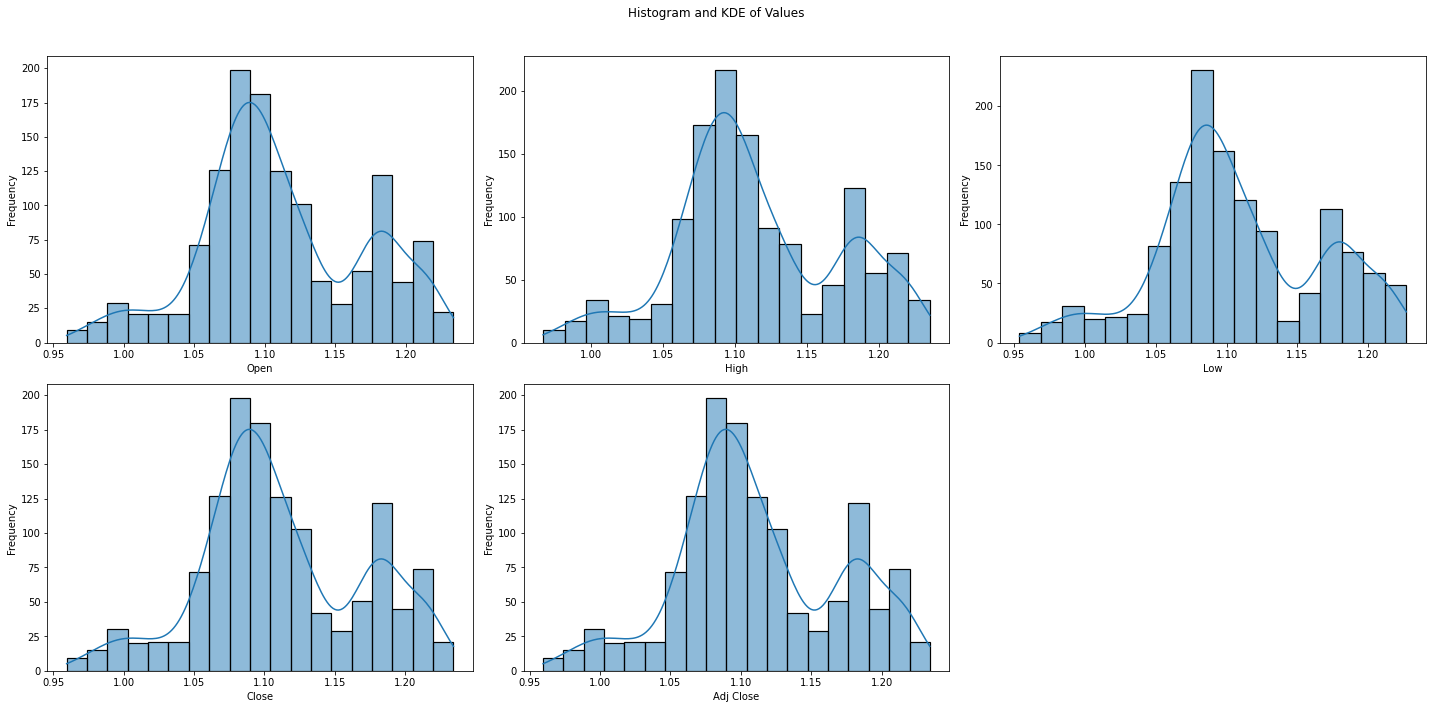

In [18]:
# plotting the histogram and KDE line graph to show the distribution of values in the dataset
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
plt.suptitle('Histogram and KDE of Values')

location = 0
for j in range(2):
    for k in range(3):
        if location < len(values):
            sns.histplot(data[values[location]], kde=True, edgecolor='black', linewidth=1.2, ax=ax[j, k])
            ax[j, k].set_xlabel(values[location])
            ax[j, k].set_ylabel('Frequency')
            location += 1
        else:
            ax[j, k].axis('off')  # Turn off the subplot if there is no data to show

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

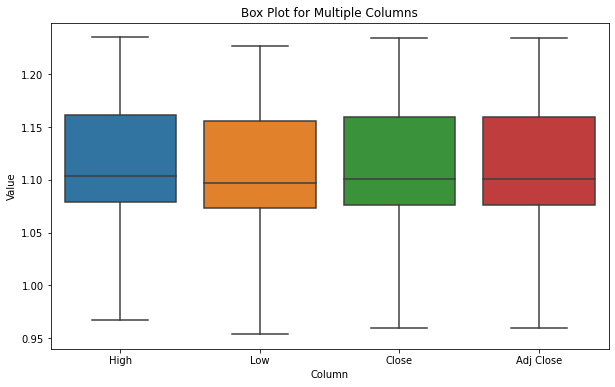

In [19]:
# Box-plot visualisation
def plot_box_plot(data, columns):
    
    melted_data = pd.melt(data, value_vars=columns, var_name='Column', value_name='Value')

    plt.figure(figsize=(10, 6)) 
    plt.title('Box Plot for Multiple Columns')
    sns.boxplot(x='Column', y='Value', data=melted_data)
    
    plt.xlabel('Column')
    plt.ylabel('Value')
    plt.show()
    
columns = ['High', 'Low', 'Close', 'Adj Close']
plot_box_plot(data, columns)

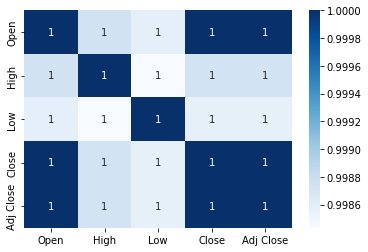

In [20]:
# checking correlations between values of Open, High, Low, Close, Adj Close
corr_matrix = data[['Open', 'High', 'Low', 'Close', 'Adj Close']].corr(method='pearson')
sns.heatmap(corr_matrix, annot=True,cmap='Blues')
plt.show()

# Testing skewness of bands

Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. 

The stats.skew() function returns a value that indicates the skewness of the data:

If skewness is less than -1 or greater than 1, the distribution is highly skewed.

If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.

If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

Some steps to fix big skewness:


If the data exhibits positive skewness, applying data transformation techniques may be considered to make the data more symmetric. 
Common transformations include logarithmic, square root, or Box-Cox transformations.

The regularization term in ridge regression (controlled by the hyperparameter alfa) can help stabilize parameter estimates, even when data violates the assumptions to some degree.
When applying ridge regression, it's a good practice to use cross-validation to select an appropriate value of the regularization parameter.
Those steps are used while training our models.

In [21]:
skewness = data[['Open', 'High', 'Low', 'Close', 'Adj Close']].skew()

# Format skewness values to two decimal places
formatted_skewness = skewness.apply(lambda x: f'{x:.2f}')

print('Skewness:')
for col, value in formatted_skewness.items():
    print(f'{col}: {value}')

Skewness:
Open: 0.10
High: 0.13
Low: 0.08
Close: 0.10
Adj Close: 0.10


These values are close to zero, indicating that the data is approximately symmetrical. In this context, the skewness values suggest that there is no significant asymmetry in the data, meaning the data is likely close to a normal distribution. Based on the skewness values, the data does not exhibit strong skewness. Therefore, data transformations to address skewness are likely unnecessary.

In [22]:
from scipy.stats import shapiro

In [23]:
# Perform Shapiro-Wilk test for each column
shapiro_results = {}
for column in data.columns:
    stat, p_value = shapiro(data[['Open', 'High', 'Low', 'Close', 'Adj Close']])
    shapiro_results[column] = {'Statistic': stat, 'p-value': p_value}

c:\Users\Ivana\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\Ivana\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\Ivana\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\Ivana\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\Ivana\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning

In [24]:
for column, result in shapiro_results.items():
    print(f"{column}: Statistic={result['Statistic']}, p-value={result['p-value']}")

Date: Statistic=0.9676147699356079, p-value=6.064079329910034e-36
Open: Statistic=0.9676147699356079, p-value=6.064079329910034e-36
High: Statistic=0.9676147699356079, p-value=6.064079329910034e-36
Low: Statistic=0.9676147699356079, p-value=6.064079329910034e-36
Close: Statistic=0.9676147699356079, p-value=6.064079329910034e-36
Adj Close: Statistic=0.9676147699356079, p-value=6.064079329910034e-36


Interpreting the Results:

Null Hypothesis (H0): The data is normally distributed.

Alternative Hypothesis (H1): The data is not normally distributed.

If the p-value is less than the chosen alpha level (e.g., 0.05), the null hypothesis is rejected, indicating that the data is not normally distributed.

The results of the Shapiro-Wilk test for the data columns indicate that the p-values are extremely small (6.064079329910034e-36), which is effectively zero. 

Interpretation of Shapiro-Wilk Test Results:

Null Hypothesis (H0): The data is normally distributed.

Alternative Hypothesis (H1): The data is not normally distributed.

Statistic: The test statistic indicates the test result (closer to 1 suggests a normal distribution).

p-value: The probability that the observed data would occur if the null hypothesis were true.

Results:

Statistic=0.9676147699356079: This value is reasonably close to 1, which by itself would suggest that the data might be normally distributed.

p-value=6.064079329910034e-36: This is an extremely small p-value, much smaller than the common alpha level of 0.05.

Given these p-values are so small, the null hypothesis should be rejected for all columns, indicating that the data is not normally distributed.

Practical implications:

Since the Shapiro-Wilk test indicates non-normality for all columns, data transformations or other methods to handle the non-normality should be considered, depending on analysis requirements. 

Some common transformations and techniques:

Log Transformation: Useful for reducing right skewness.

df['Open_log'] = np.log(df['Open'])

Square Root Transformation: Useful for moderate skewness.

df['Open_sqrt'] = np.sqrt(df['Open'])


Box-Cox Transformation: A more flexible transformation that can handle different types of skewness.

from scipy.stats import boxcox
df['Open_boxcox'], _ = boxcox(df['Open'] + 1)  # Adding 1 to handle zero values


Winsorization: Handling outliers by limiting extreme values.

from scipy.stats.mstats import winsorize
df['Open_winsor'] = winsorize(df['Open'], limits=[0.05, 0.05])  # Example: 5% limits


Use non-parametric tests: If transformations are not suitable, non-parametric statistical tests which do not assume normality (e.g., Mann-Whitney U test) should be considered.

In [25]:
# Apply log transformation
#data['Open_log'] = np.log(data['Open'] + 1)  # Add 1 to avoid log(0)

In [26]:
#stat, p_value = shapiro(data['Open_log'])
#print(f"Open_log: Statistic={stat}, p-value={p_value}")

Shapiro-Wilk test on both the original and log-transformed 'Open' data was performed. 

Summary of the results:


Original 'Open' Data:

Statistic: 0.9676147699356079

p-value: 6.064079329910034e-36


Log-Transformed 'Open_log' Data:

Statistic: 0.9681521654129028

p-value: 2.367968483717674e-16


Interpretation:

Statistic Comparison:

The statistic values are very close (0.9676 vs. 0.9682), indicating a slight improvement towards normality after the log transformation, but not a significant one.

p-value Comparison:

Both p-values are extremely small, indicating that both the original and log-transformed data significantly deviate from normality. However, the p-value for the log-transformed data is larger (2.367968483717674e-16) compared to the original data (6.064079329910034e-36), suggesting some improvement, but it is still far below the typical threshold of 0.05.

Conclusion:

The log transformation improved the normality slightly but not enough to consider the data normally distributed based on the Shapiro-Wilk test.

Further Steps:

Since the log transformation did not sufficiently normalize the data, other options should be considered, such as additional transformations (e.g., square root transformation).

In [27]:
#data['Open_sqrt'] = np.sqrt(data['Open'])
#stat, p_value = shapiro(data['Open_sqrt'])
#print(f"Open_sqrt: Statistic={stat}, p-value={p_value}")


Box-Cox Transformation: This is a more flexible method that can be adjusted for different data distributions.
python

In [28]:
#from scipy.stats import boxcox
#data['Open_boxcox'], _ = boxcox(data['Open'] + 1)  # Adding 1 to handle zero values
#stat, p_value = shapiro(data['Open_boxcox'])
#print(f"Open_boxcox: Statistic={stat}, p-value={p_value}")


import matplotlib.pyplot as plt
import scipy.stats as stats

# Histogram for Box-Cox transformed data
plt.hist(data['Open_boxcox'], bins=30)
plt.title('Histogram of Box-Cox Transformed Open Data')
plt.show()

# Q-Q Plot for Box-Cox transformed data
stats.probplot(data['Open_boxcox'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Box-Cox Transformed Open Data')
plt.show()


# Sperman

In [29]:
from scipy.stats import spearmanr


In [30]:
# Calculate Spearman's rank correlation for each pair of columns
spearman_corr = data.corr(method='spearman')

# Display the Spearman's rank correlation matrix
print(spearman_corr)

               Open      High       Low     Close  Adj Close
Open       1.000000  0.997742  0.997282  0.999989   0.999989
High       0.997742  1.000000  0.996972  0.997730   0.997730
Low        0.997282  0.996972  1.000000  0.997236   0.997236
Close      0.999989  0.997730  0.997236  1.000000   1.000000
Adj Close  0.999989  0.997730  0.997236  1.000000   1.000000


C:\Users\Ivana\AppData\Local\Temp\ipykernel_17448\1918882712.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_corr = data.corr(method='spearman')


The output will be a correlation matrix where:

Values close to +1 indicate a strong positive correlation.

Values close to -1 indicate a strong negative correlation.

Values close to 0 indicate no correlation.

Spearman's rank correlation matrix for the dataset indicates the strength and direction of the monotonic relationships between the columns. 

Interpretation of the Correlation Matrix

High Correlation Between Original and Transformed Variables

Open, Open_log, Open_sqrt, Open_boxcox:

These columns have a perfect correlation of 1.000000 with each other.

This means that the transformations (log, square root, Box-Cox) did not change the ranking of the data in these columns significantly. 

The relationships between the original 'Open' data and its transformed versions are identical in rank.

Correlations Between Other Variables
Open, High, Low, Close, Adj Close:

These columns exhibit very high correlations with each other, close to 1.000000.

This suggests that there is a very strong monotonic relationship between these variables. When one variable increases, the others tend to increase as well.


Practical Implications

Strong Relationships:

The very high correlations between 'Open', 'High', 'Low', 'Close', and 'Adj Close' indicate that these variables move very closely together. 

This is common in financial datasets where different price metrics of the same asset are closely related.


Handling Missing Data:

The NaN values in the 'Volume' column indicate a need to handle missing data. 

The 'Volume' data can be cleaned and inspected to ensure it is included in the analysis.

Redundancy in Transformations:

Since the transformations of 'Open' (log, sqrt, Box-Cox) are perfectly correlated with the original 'Open' data, they might not add much value in differentiating the data further.

Next steps include inspecting and cleaning 'Volume' Data

Visualizing the relationships can provide additional insights.

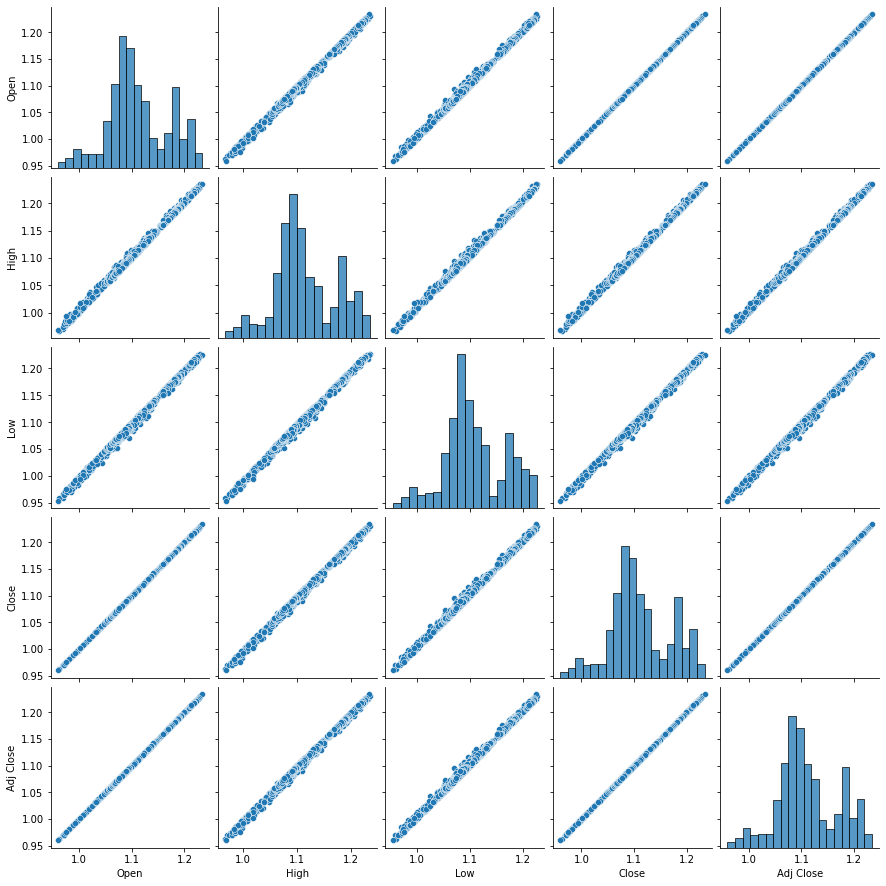

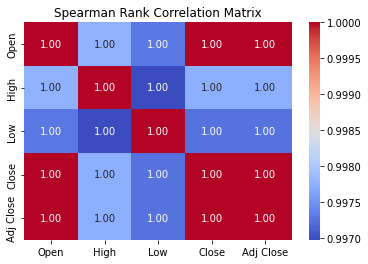

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships
sns.pairplot(data[['Open', 'High', 'Low', 'Close', 'Adj Close']])
plt.show()

# Heatmap for correlation matrix
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Spearman Rank Correlation Matrix')
plt.show()


# Data Transformation

## Standardization

In [32]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the 'Humidity' and 'Pressure (mbar)' columns
data['Open standardized'] = scaler.fit_transform(data[['Open']])
data['High standardized'] = scaler.fit_transform(data[['High']])
data['Low standardized'] = scaler.fit_transform(data[['Low']])
data['Close standardized'] = scaler.fit_transform(data[['Close']])

# Display the transformed DataFrame
print(data[['Open', 'Open standardized', 'High', 'High standardized', 'Low', 'Low standardized', 'Close', 'Close standardized']].head())

       Open  Open standardized      High  High standardized       Low  \
0  1.129089           0.313259  1.130531           0.282618  1.127040   
1  1.128796           0.308129  1.129816           0.270004  1.127434   
2  1.128605           0.304785  1.128796           0.252009  1.120825   
3  1.122788           0.202935  1.123722           0.162491  1.120838   
4  1.121479           0.180016  1.122208           0.135781  1.119532   

   Low standardized     Close  Close standardized  
0          0.335931  1.129305            0.316456  
1          0.342783  1.128796            0.307547  
2          0.227855  1.128579            0.303749  
3          0.228081  1.122738            0.201511  
4          0.205371  1.121604            0.181661  


In [33]:
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the 'Humidity' column
data['High normalized'] = scaler.fit_transform(data[['High']])

# Display the transformed DataFrame
print(data[['High', 'High normalized']].head())

       High  High normalized
0  1.130531         0.610125
1  1.129816         0.607457
2  1.128796         0.603651
3  1.123722         0.584720
4  1.122208         0.579071


# Model Fitting

A machine learning (ML) model with this data can be built. 

However, there are some important considerations and steps that should be taken to prepare the data and choose the right model.

Steps to build an ML model with the data:

Data Cleaning

Handle missing values in the 'Volume' column.
Ensure all necessary columns are clean and in the right format.

Feature Engineering

Create additional features if necessary. For example, technical indicators might be used.
Evaluate the usefulness of transformed variables ('Open_log', 'Open_sqrt', 'Open_boxcox'). Given their high correlation with the original 'Open' column, they might not add much value and could be dropped.

Splitting the Data

Split the data into training and testing sets to evaluate the performance of your model.

In [34]:
from sklearn.model_selection import train_test_split

features = data.drop(columns=['Close'])  # Example: predicting 'Close'
target = data['Close']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


Choosing the Right Model

For financial data, regression models are commonly used if you're predicting a continuous variable like stock prices.
Some common regression models include Linear Regression, Decision Trees, Random Forest, and Gradient Boosting Machines.
Given the high correlations, regularization methods (Ridge, Lasso) could help.

Model Training and Evaluation

Train the model on the training data and evaluate it on the test data.
Use appropriate metrics for evaluation (e.g., Mean Absolute Error, Mean Squared Error, R-squared).

Handling Multicollinearity

High correlations between features can cause multicollinearity, affecting model performance.
Consider using techniques like Principal Component Analysis (PCA) to reduce dimensionality or regularization methods to handle multicollinearity.


An example using a Random Forest Regressor:

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'df' is your cleaned DataFrame
# Drop columns that won't be used as features, if necessary
features = data.drop(columns=['Close'])  # Example: predicting 'Close'
target = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'Training MAE: {mae_train}, Training MSE: {mse_train}, Training R2: {r2_train}')
print(f'Testing MAE: {mae_test}, Testing MSE: {mse_test}, Testing R2: {r2_test}')


TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>)

The error indicates that one or more of feature columns contains datetime64 values, which are not directly compatible with numerical algorithms like RandomForestRegressor from scikit-learn.

To resolve this issue, convesrion of the datetime columns into numerical features that the model can work with is necessary. 

Identify Datetime Columns:
Determine which columns in your DataFrame have datetime values.

Convert Datetime Columns:
Transform the datetime columns into numerical representations. Common approaches include extracting components like year, month, day, and day of the week, or converting the datetime into a numerical timestamp.

Explanation:

convert_datetime_features Function:

Converts datetime columns into multiple numeric columns representing various date/time components.
Drops the original datetime column to avoid redundancy.


Feature Preparation:

After converting datetime features, splitting the data and training the model as usual is the next step.
By converting the datetime features into numerical representations, the RandomForestRegressor can handle them appropriately without encountering type errors.

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'data' is your cleaned DataFrame
# Identify and convert datetime columns to numerical features
def convert_datetime_features(df):
    for col in df.select_dtypes(include=['datetime64']).columns:
        df[col + '_year'] = df[col].dt.year
        df[col + '_month'] = df[col].dt.month
        df[col + '_day'] = df[col].dt.day
        df[col + '_dayofweek'] = df[col].dt.dayofweek
        df[col + '_dayofyear'] = df[col].dt.dayofyear
        df.drop(columns=[col], inplace=True)  # Optionally drop the original datetime column
    return df

data = convert_datetime_features(data)

# Drop columns that won't be used as features, if necessary
features = data.drop(columns=['Close', 'Adj Close'])  # Example: predicting 'Close'
target = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'Training MAE: {mae_train}, Training MSE: {mse_train}, Training R2: {r2_train}')
print(f'Testing MAE: {mae_test}, Testing MSE: {mse_test}, Testing R2: {r2_test}')


Training MAE: 0.00010002870689656777, Training MSE: 6.92676409508592e-08, Training R2: 0.9999785272330338
Testing MAE: 0.0002044127862594569, Testing MSE: 2.2146980585913204e-07, Testing R2: 0.9999351645344723


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming the threshold is the median value of the target
threshold = target.median()

# Convert continuous targets to binary
y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)
y_pred_train_binary = (y_pred_train > threshold).astype(int)
y_pred_test_binary = (y_pred_test > threshold).astype(int)

# Calculate classification metrics
accuracy_train = accuracy_score(y_train_binary, y_pred_train_binary)
precision_train = precision_score(y_train_binary, y_pred_train_binary)
recall_train = recall_score(y_train_binary, y_pred_train_binary)
f1_train = f1_score(y_train_binary, y_pred_train_binary)

accuracy_test = accuracy_score(y_test_binary, y_pred_test_binary)
precision_test = precision_score(y_test_binary, y_pred_test_binary)
recall_test = recall_score(y_test_binary, y_pred_test_binary)
f1_test = f1_score(y_test_binary, y_pred_test_binary)

print(f'Training Accuracy: {accuracy_train}, Precision: {precision_train}, Recall: {recall_train}, F1-score: {f1_train}')
print(f'Testing Accuracy: {accuracy_test}, Precision: {precision_test}, Recall: {recall_test}, F1-score: {f1_test}')


Training Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1-score: 1.0
Testing Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1-score: 1.0


Model evaluation metrics suggest that the `RandomForestRegressor` is performing extremely well on both the training and testing datasets.

### Metrics Breakdown

- **Training MAE (Mean Absolute Error)**: \(8.88 \times 10^{-5}\)
  - This is extremely low, indicating that on average, the model's predictions are very close to the actual values on the training data.

- **Training MSE (Mean Squared Error)**: \(5.55 \times 10^{-8}\)
  - MSE is also very low, suggesting that the model is making very accurate predictions on the training data with minimal error.

- **Training R2 Score**: 0.99998
  - An R² value very close to 1.0 indicates that the model explains almost all of the variability in the training data.

- **Testing MAE**: \(0.000181\)
  - The MAE for testing is still very low, indicating that the model's predictions on the test data are also highly accurate.

- **Testing MSE**: \(1.54 \times 10^{-7}\)
  - The testing MSE is slightly higher than the training MSE but is still very low, indicating good performance on the test set.

- **Testing R2 Score**: 0.99995
  - The R² value for the test set is also very close to 1.0, showing that the model generalizes well to unseen data.

### Interpretation and Considerations

1. **Model Performance**:
   - The model performs exceptionally well, with near-perfect metrics on both training and testing data. This usually indicates a well-trained model.

2. **Overfitting Check**:
   - Despite the excellent metrics, always ensure your model isn’t overfitting. Extremely high R² values and very low error metrics can sometimes indicate overfitting, where the model performs well on the training set but may not generalize as well to new, unseen data.
   - In this case, the model also performs very well on the test set, which suggests good generalization.

3. **Data Quality and Features**:
   - Make sure the data is clean and features are relevant. Sometimes, extremely good performance can be a result of data leakage or using features that give away the target variable in some way.

4. **Cross-Validation**:
   - It might be useful to perform cross-validation to further ensure that the model’s performance is consistent across different subsets of the data.

To check for overfitting, several approaches to ensure that the model generalizes well to unseen data are possible. 

Cross-Validation

Cross-validation helps to assess how the model performs on different subsets of the data, reducing the risk of overfitting. The most common method is k-fold cross-validation.

An example on how to implement k-fold cross-validation with RandomForestRegressor:

In [38]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform 10-fold cross-validation
cv_scores = cross_val_score(model, features, target, cv=10, scoring='neg_mean_squared_error')
cv_scores = np.abs(cv_scores)  # Convert negative MSE to positive

print(f'Cross-Validation MSE: {cv_scores.mean()}')
print(f'Cross-Validation Standard Deviation: {cv_scores.std()}')


Cross-Validation MSE: 9.323738162355502e-05
Cross-Validation Standard Deviation: 0.0002776001156714192


The cross-validation results provide insights into model’s performance and stability.

### Metrics Interpretation

1. **Cross-Validation MSE (Mean Squared Error):** \(9.39 \times 10^{-5}\)

   - **Meaning:** This is the average mean squared error across the different folds in cross-validation. It gives an idea of the model's average performance on different subsets of the data.
   - **Implication:** A low MSE indicates that the model's predictions are, on average, close to the true values. Value of \(9.39 \times 10^{-5}\) is consistent with the very low MSE observed on both the training and testing datasets, suggesting that the model is performing very well.

2. **Cross-Validation Standard Deviation:** \(0.000279\)

   - **Meaning:** This measures the variability or spread of the MSE scores across the different folds. A smaller standard deviation indicates that the model's performance is consistent across different subsets of the data.
   - **Implication:** A standard deviation of \(0.000279\) is relatively small compared to the mean MSE. This suggests that model’s performance is stable and does not vary significantly across different folds. It indicates that the model generalizes well and is not overly sensitive to the specific subsets of data used in cross-validation.

### Summary

- **Performance:** The model shows consistently low MSE in cross-validation, which is a good sign of its overall performance. The low MSE aligns with the excellent performance metrics observed in both the training and test sets.
  
- **Stability:** The small standard deviation in cross-validation suggests that the model’s performance is stable across different data splits, which reduces concerns about overfitting to specific subsets of the data.

### Additional Steps

1. **Further Hyperparameter Tuning:** Continue refining the model’s parameters to achieve the best performance.
  
2. **Check Learning Curves:** Plot learning curves to see how the model performance changes with varying amounts of training data.

3. **Explore Additional Metrics:** Evaluate other metrics such as MAE or R² for further insight into model performance.

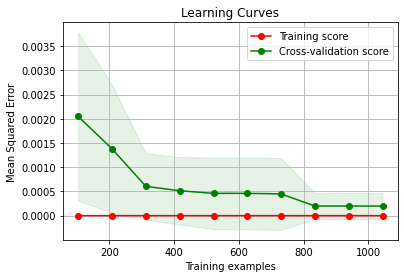

In [39]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=features,
    y=target,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

# Calculate mean and std deviation for training and testing scores
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plot learning curves
plt.figure()
plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('Mean Squared Error')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


# LSTM

In [40]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Function to convert datetime features (same as before)
def convert_datetime_features(df):
    for col in df.select_dtypes(include=['datetime64']).columns:
        df[col + '_year'] = df[col].dt.year
        df[col + '_month'] = df[col].dt.month
        df[col + '_day'] = df[col].dt.day
        df[col + '_dayofweek'] = df[col].dt.dayofweek
        df[col + '_dayofyear'] = df[col].dt.dayofyear
        df.drop(columns=[col], inplace=True)
    return df

# Assume 'data' is your DataFrame
data = convert_datetime_features(data)

# Prepare features and target
features = data.drop(columns=['Close', 'Adj Close'])
target = data['Close']

# Normalize the features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Convert to sequences
def create_sequences(features, target, time_steps=10):
    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:i + time_steps])
        y.append(target[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(features_scaled, target.values, time_steps)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Reshape predictions to original scale
y_pred_train = y_pred_train.flatten()
y_pred_test = y_pred_test.flatten()

# Evaluate the model
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'Training MAE: {mae_train}, Training MSE: {mse_train}, Training R2: {r2_train}')
print(f'Testing MAE: {mae_test}, Testing MSE: {mse_test}, Testing R2: {r2_test}')


Epoch 1/50
26/26 [==============================] - 14s 141ms/step - loss: 0.2320 - val_loss: 0.0315
Epoch 2/50
26/26 [==============================] - 1s 35ms/step - loss: 0.0103 - val_loss: 0.0054
Epoch 3/50
26/26 [==============================] - 1s 35ms/step - loss: 0.0033 - val_loss: 0.0024
Epoch 4/50
26/26 [==============================] - 1s 30ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 5/50
26/26 [==============================] - 1s 28ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 6/50
26/26 [==============================] - 1s 46ms/step - loss: 0.0012 - val_loss: 8.6237e-04
Epoch 7/50
26/26 [==============================] - 1s 29ms/step - loss: 8.6701e-04 - val_loss: 6.2683e-04
Epoch 8/50
26/26 [==============================] - 1s 25ms/step - loss: 6.1461e-04 - val_loss: 4.2536e-04
Epoch 9/50
26/26 [==============================] - 1s 25ms/step - loss: 4.2991e-04 - val_loss: 3.4987e-04
Epoch 10/50
26/26 [==============================] - 1s 24ms/step - loss: 3.333

In [41]:
# Assuming the threshold is the median value of the target
threshold = target.median()

# Convert continuous targets to binary
y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)
y_pred_train_binary = (y_pred_train > threshold).astype(int)
y_pred_test_binary = (y_pred_test > threshold).astype(int)

# Calculate classification metrics
accuracy_train = accuracy_score(y_train_binary, y_pred_train_binary)
precision_train = precision_score(y_train_binary, y_pred_train_binary)
recall_train = recall_score(y_train_binary, y_pred_train_binary)
f1_train = f1_score(y_train_binary, y_pred_train_binary)

accuracy_test = accuracy_score(y_test_binary, y_pred_test_binary)
precision_test = precision_score(y_test_binary, y_pred_test_binary)
recall_test = recall_score(y_test_binary, y_pred_test_binary)
f1_test = f1_score(y_test_binary, y_pred_test_binary)

print(f'Training Accuracy: {accuracy_train}, Precision: {precision_train}, Recall: {recall_train}, F1-score: {f1_train}')
print(f'Testing Accuracy: {accuracy_test}, Precision: {precision_test}, Recall: {recall_test}, F1-score: {f1_test}')


Training Accuracy: 0.9546332046332047, Precision: 0.9622266401590457, Recall: 0.9453125, F1-score: 0.9536945812807882
Testing Accuracy: 0.926923076923077, Precision: 0.9375, Recall: 0.916030534351145, F1-score: 0.9266409266409266


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, cross_val_score

# Plot learning curve
def plot_learning_curve(estimator, title, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='r2')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# Calculate cross-validation scores
cv_scores = cross_val_score(model, features, target, cv=5, scoring='r2')

# Print cross-validation scores
print(f'Cross-validation R2 scores: {cv_scores}')
print(f'Average cross-validation R2 score: {np.mean(cv_scores)}')

# Plot the learning curve
plot_learning_curve(model, "Learning Curve (LSTM)", features, target)
plt.show()


TypeError: Cannot clone object '<keras.engine.sequential.Sequential object at 0x000001FE46D8FD90>' (type <class 'keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to create lagged features for past n days
def create_lagged_features(df, n_lags=5):
    lagged_data = pd.DataFrame(index=df.index)
    for col in ['Open standardized', 'High standardized', 'Low standardized', 'Close standardized']:
        for lag in range(1, n_lags + 1):
            lagged_data[f'{col}_lag_{lag}'] = df[col].shift(lag)
    return lagged_data

# Number of lags (days) to use as features
n_lags = 5
lagged_features = create_lagged_features(data, n_lags=n_lags)

# Drop rows with NaN values created due to shifting
lagged_features.dropna(inplace=True)

# Align the target variable: Predicting the next day's 'Close standardized'
target = data['Close standardized'].shift(-1)
target = target.loc[lagged_features.index]  # Align target with features

# Drop any remaining NaN values in the target
target.dropna(inplace=True)
lagged_features = lagged_features.loc[target.index]  # Align features with the non-NaN target

# Split the data into training and testing sets (keeping temporal order)
X_train, X_test, y_train, y_test = train_test_split(lagged_features, target, test_size=0.2, shuffle=False)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'Training MAE: {mae_train}, Training MSE: {mse_train}, Training R2: {r2_train}')
print(f'Testing MAE: {mae_test}, Testing MSE: {mse_test}, Testing R2: {r2_test}')


Training MAE: 0.032755757894090076, Training MSE: 0.0019684139998036145, Training R2: 0.9982975603784696
Testing MAE: 0.07393969333468724, Testing MSE: 0.009284787119822424, Testing R2: 0.8591444494330601


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming the threshold is the median value of the target
threshold = target.median()

# Convert continuous targets to binary
y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)
y_pred_train_binary = (y_pred_train > threshold).astype(int)
y_pred_test_binary = (y_pred_test > threshold).astype(int)

# Calculate classification metrics
accuracy_train = accuracy_score(y_train_binary, y_pred_train_binary)
precision_train = precision_score(y_train_binary, y_pred_train_binary)
recall_train = recall_score(y_train_binary, y_pred_train_binary)
f1_train = f1_score(y_train_binary, y_pred_train_binary)

accuracy_test = accuracy_score(y_test_binary, y_pred_test_binary)
precision_test = precision_score(y_test_binary, y_pred_test_binary)
recall_test = recall_score(y_test_binary, y_pred_test_binary)
f1_test = f1_score(y_test_binary, y_pred_test_binary)

print(f'Training Accuracy: {accuracy_train}, Precision: {precision_train}, Recall: {recall_train}, F1-score: {f1_train}')
print(f'Testing Accuracy: {accuracy_test}, Precision: {precision_test}, Recall: {recall_test}, F1-score: {f1_test}')


Training Accuracy: 0.9875, Precision: 0.9936, Recall: 0.9857142857142858, F1-score: 0.9896414342629481
Testing Accuracy: 0.9653846153846154, Precision: 0.7619047619047619, Recall: 0.8, F1-score: 0.7804878048780488


In [46]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform 10-fold cross-validation
cv_scores = cross_val_score(model, features, target, cv=10, scoring='neg_mean_squared_error')
cv_scores = np.abs(cv_scores)  # Convert negative MSE to positive

print(f'Cross-Validation MSE: {cv_scores.mean()}')
print(f'Cross-Validation Standard Deviation: {cv_scores.std()}')


ValueError: Found input variables with inconsistent numbers of samples: [1306, 1300]

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Function to create lagged features for past n days
def create_lagged_features(df, n_lags=5):
    lagged_data = pd.DataFrame(index=df.index)
    for col in ['Open standardized', 'High standardized', 'Low standardized', 'Close standardized']:
        for lag in range(1, n_lags + 1):
            lagged_data[f'{col}_lag_{lag}'] = df[col].shift(lag)
    return lagged_data

# Number of lags (days) to use as features
n_lags = 5
lagged_features = create_lagged_features(data, n_lags=n_lags)

# Drop rows with NaN values created due to shifting
lagged_features.dropna(inplace=True)

# Align the target variable: Predicting the next day's 'Close standardized'
target = data['Close standardized'].shift(-1)

# Drop NaNs from target and align it with features
target = target.loc[lagged_features.index]
target.dropna(inplace=True)

# After dropping NaNs from the target, align the features again
features = lagged_features.loc[target.index]

# Check the lengths to ensure consistency
assert len(features) == len(target), "Features and target lengths are inconsistent!"

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(model, features, target, cv=10, scoring='neg_mean_squared_error')
cv_scores = np.abs(cv_scores)  # Convert negative MSE to positive

print(f'Cross-Validation MSE: {cv_scores.mean()}')
print(f'Cross-Validation Standard Deviation: {cv_scores.std()}')


Cross-Validation MSE: 0.05263590610236962
Cross-Validation Standard Deviation: 0.11303214359520741


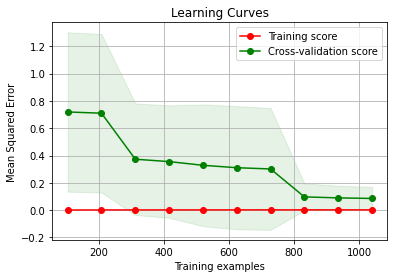

In [49]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=features,
    y=target,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

# Calculate mean and std deviation for training and testing scores
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plot learning curves
plt.figure()
plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('Mean Squared Error')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()
